In [ ]:
from sklearn import tree
x = [[0, 0], [1, 1]]
y = [0, 1]

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y) #학습

In [ ]:
clf.predict([[2., 2.]]) #정답데이터가 0, 1만 존재

array([1])

In [ ]:
clf.predict_proba([[2., 2.]]) #비율로 출력

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

X, y = load_iris(return_X_y = True)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

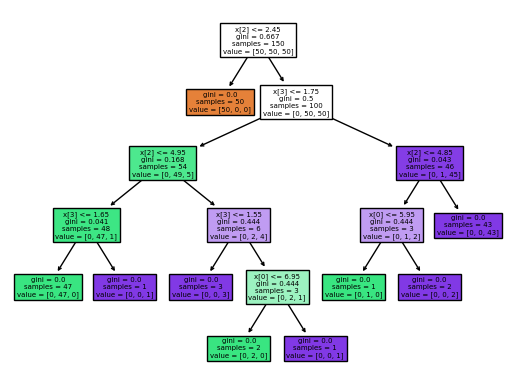

In [ ]:
t = tree.plot_tree(clf.fit(X, y), filled=True)

##Pima Indians Diabetes Database
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd #데이터분석
import numpy as np #수치계산
import seaborn as sns #시각화
import matplotlib.pyplot as plt #시각화

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#수치형 변수를 범주형 변수로 만들기
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [ ]:
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

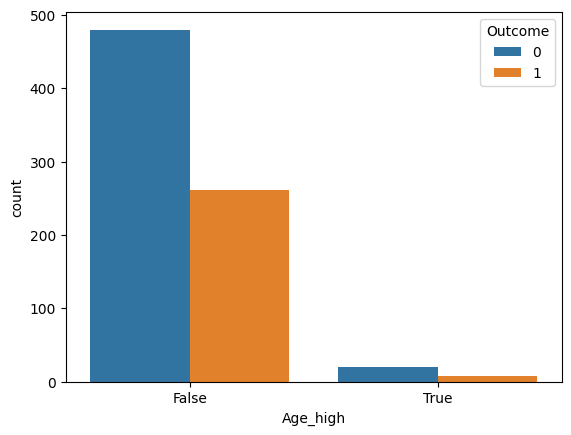

In [ ]:
sns.countplot(data = df, x="Age_high", hue = "Outcome")

In [ ]:
#결측치 다루기
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
Insulin_nan                 0
Insulin_log                 0
low_glu_insulin             0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_nan,Insulin_log
count,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000
mean,3.845052,-9.251859e-18,69.105469,20.536458,79.799479,31.992578,2.451743e-16,33.240885,0.348958,141.753906,4.821037
std,3.369578,1.000652e+00,19.355807,15.952218,115.244002,7.884160,1.000652e+00,11.760232,0.476951,89.100847,0.522623
min,0.000000,-3.783654e+00,0.000000,0.000000,0.000000,0.000000,-1.189553e+00,21.000000,0.000000,14.000000,2.708050
25%,1.000000,-6.852363e-01,62.000000,0.000000,0.000000,27.300000,-6.889685e-01,24.000000,0.000000,102.500000,4.639572
50%,3.000000,-1.218877e-01,72.000000,23.000000,30.500000,32.000000,-3.001282e-01,29.000000,0.000000,102.500000,4.639572
75%,6.000000,6.057709e-01,80.000000,32.000000,127.250000,36.600000,4.662269e-01,41.000000,1.000000,169.500000,5.138735
max,17.000000,2.444478e+00,122.000000,99.000000,846.000000,67.100000,5.883565e+00,81.000000,1.000000,846.000000,6.741701


In [ ]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin_nan", "Insulin"]].head()

,Insulin_nan,Insulin
0,NaN,0
1,NaN,0
2,NaN,0
3,94.0,94
4,168.0,168


In [ ]:
print(df["Insulin_nan"].isnull().sum()) #결측치 개수
print(df["Insulin_nan"].isnull().mean()) #결측치 비율

374
0.4869791666666667


In [ ]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["median"])

<ipython-input-192-f3e3d949f9ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["median"])


,Insulin,Insulin_nan
,median,median
Outcome,,
0,39.0,102.5
1,0.0,169.5


In [ ]:
#중앙값
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5

<ipython-input-194-cf0eabb42096>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

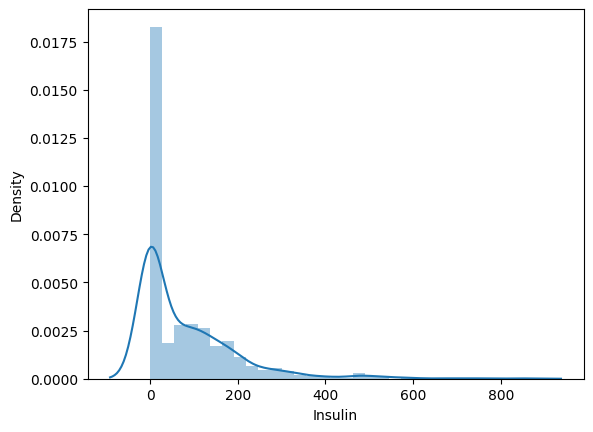

In [ ]:
sns.distplot(df["Insulin"])

<ipython-input-126-6174a7dd99b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))


<Axes: xlabel='Insulin', ylabel='Density'>

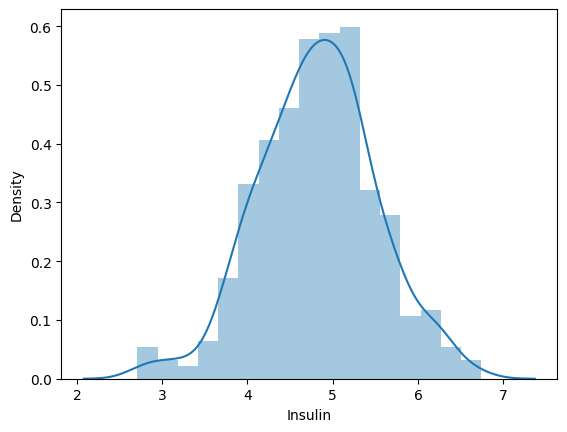

In [ ]:
sns.distplot(np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1))

<ipython-input-127-1a25c53d9892>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

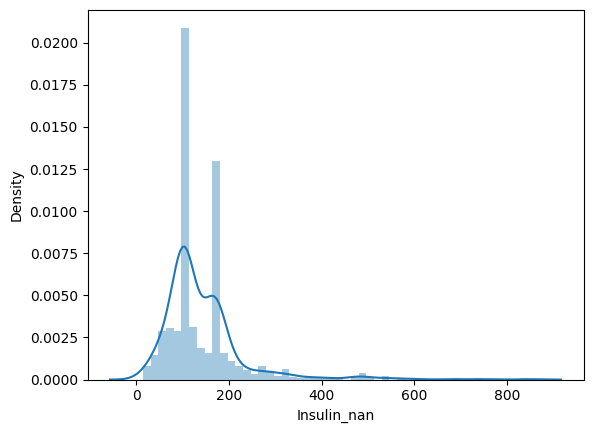

In [ ]:
sns.distplot(df["Insulin_nan"])

<ipython-input-128-038cab0b4bda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

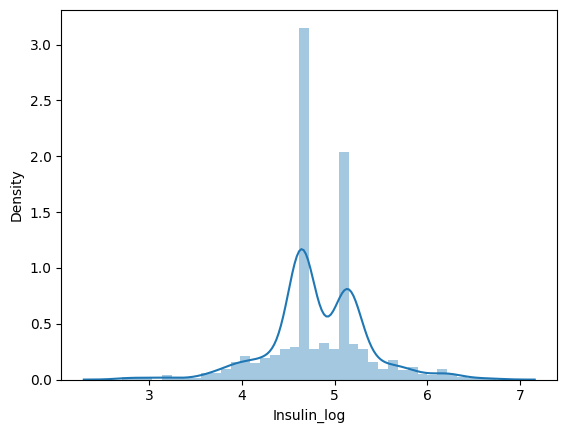

In [ ]:
df["Insulin_log"] = np.log(df["Insulin_nan"]+1)
sns.distplot(df["Insulin_log"])

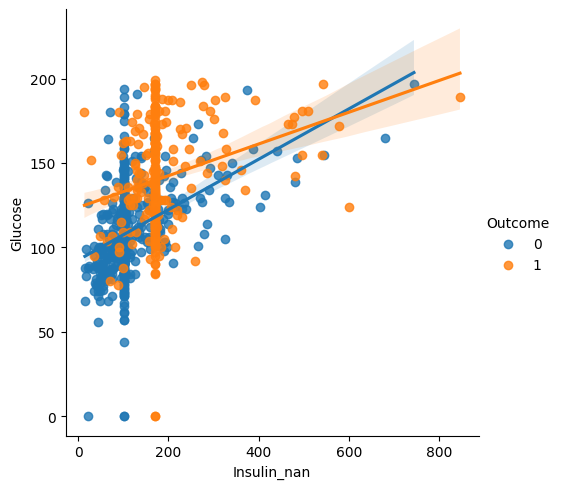

In [ ]:
sns.lmplot(data = df, x="Insulin_nan", y = "Glucose", hue="Outcome")

In [ ]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"]. head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [ ]:
#범주형 값에 대한 크로스 테이블 그리기
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,132,368
1,249,19


**이상치 다루기**

<Axes: xlabel='Insulin_nan'>

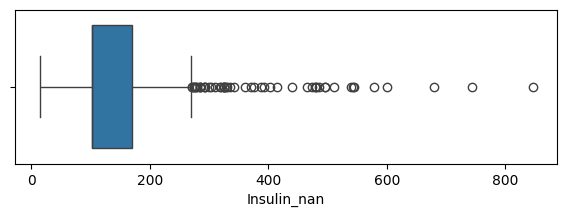

In [ ]:
plt.figure(figsize = (7, 2))
sns.boxplot(x = df["Insulin_nan"])

In [ ]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [ ]:
#상자 수염 그림 그리기 준비
IQR3 = df["Insulin_nan"].quantile(0.75) #3사분위수
IQR1 = df["Insulin_nan"].quantile(0.25) #1사분위수
IQR = IQR3 - IQR1

In [ ]:
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [ ]:
df[df["Insulin_nan"] > OUT].shape

(51, 16)

In [ ]:
df[df["Insulin_nan"] > 600].shape

(3, 16)

**피처 스케일링**

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
#scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
#scale

In [ ]:
#df[["Glucose", "DiabetesPedigreeFunction"]] = scale

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>]],
      dtype=object)

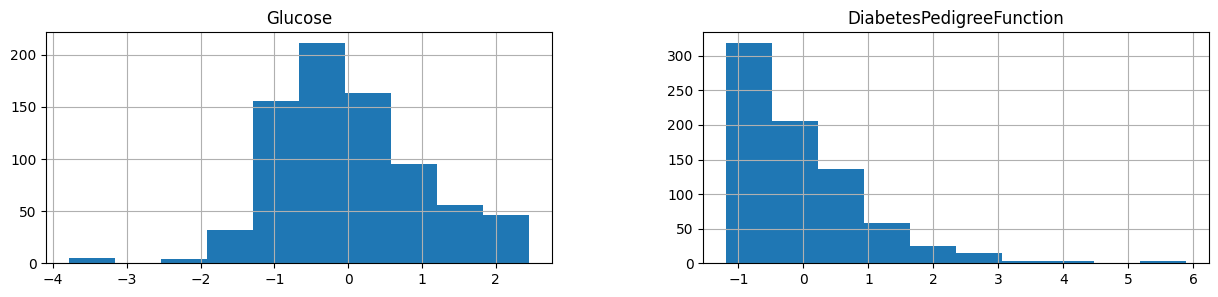

In [ ]:
#df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize = (15, 3))

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,False,False,True,180.0,5.198497,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,False,True,False,102.5,4.639572,True
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,False,True,False,112.0,4.727388,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,False,True,False,169.5,5.138735,False


In [ ]:
#새로운 데이터 프레임 저장하기
df.to_csv("/content/sample_data/diabetes_feature.csv", index = False)

In [ ]:
pd.read_csv("/content/sample_data/diabetes_feature.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,False,False,True,180.0,5.198497,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,False,True,False,102.5,4.639572,True
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,False,True,False,112.0,4.727388,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,False,True,False,169.5,5.138735,False


In [ ]:
split_count = int(df.shape[0] * 0.8) #인덱스값 설정
split_count

614

In [ ]:
#데이터셋을 8:2 비율로 나누기
train = df[:split_count].copy() #0 ~ 613까지 자름
train.shape

(614, 16)

In [ ]:
test = df[split_count:].copy() #614 ~ 767까지 자름

In [ ]:
#학습, 예측에 사용할 컬럼
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

In [ ]:
#정답이자 예측해야하는 값
label_name = "Outcome"
label_name

'Outcome'

In [ ]:
#학습세트 만들기
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)

(614, 9)
(614,)


In [ ]:
#예측세트 만들기
X_test = test[feature_names]
y_test = test[label_name]

In [ ]:
from sklearn.tree import DecisionTreeClassifier #당뇨병인지 아닌지
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train) #학습

DecisionTreeClassifier()

In [ ]:
y_preds = model.predict(X_test) #예측
y_preds[:5]

array([1, 0, 0, 0, 1])

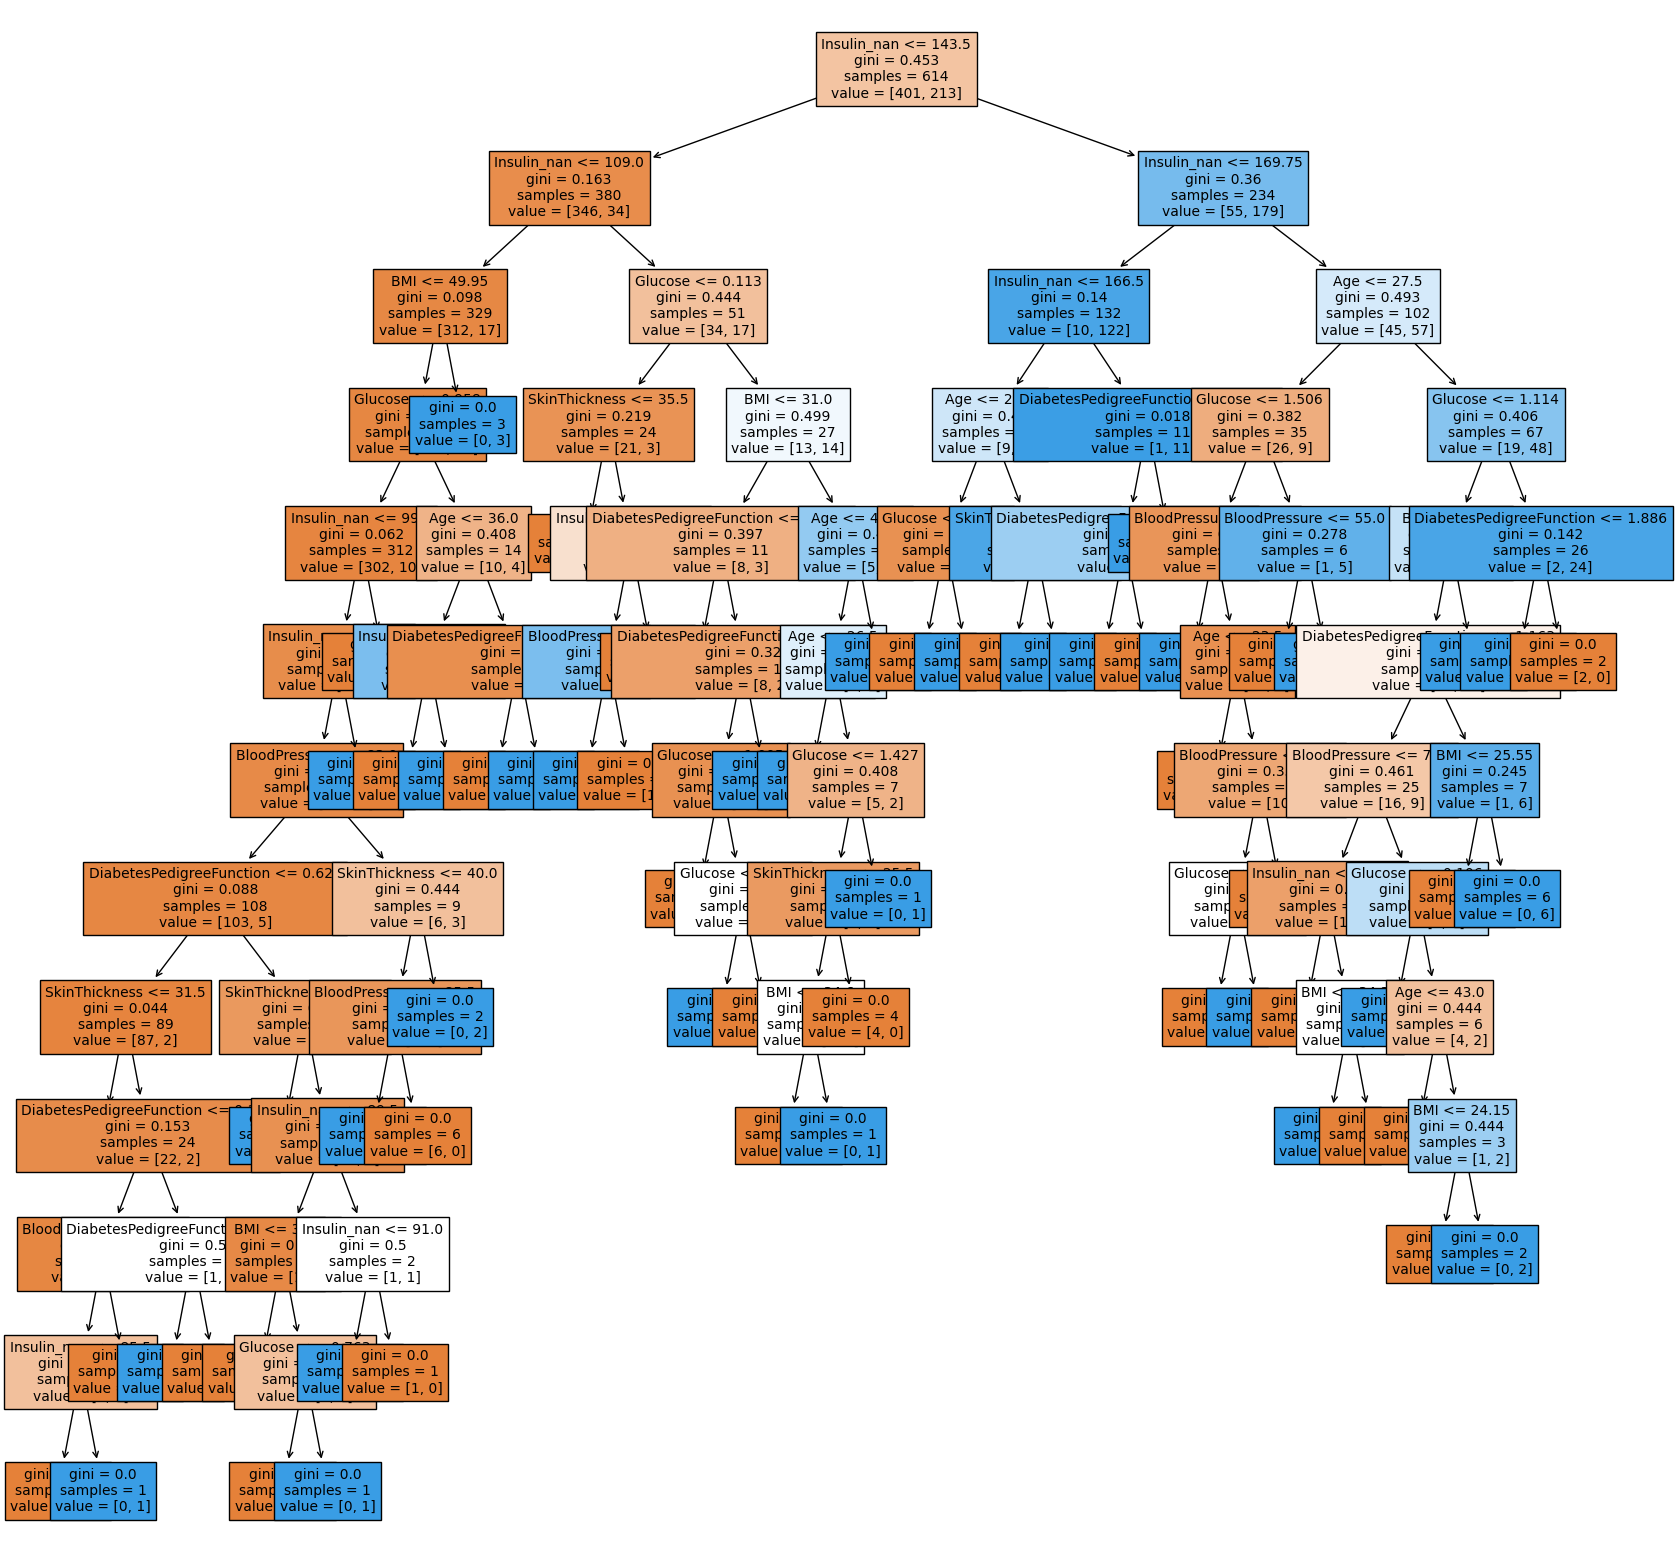

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree = plot_tree(model, feature_names = feature_names, filled = True, fontsize = 10)

<Axes: >

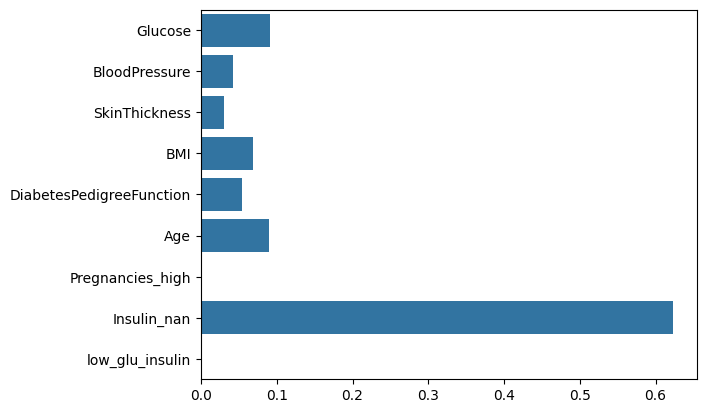

In [ ]:
model.feature_importances_ #피처 중요도 추출
sns.barplot(x=model.feature_importances_, y = feature_names)

In [ ]:
#같은 값은 0이 됨
diff_count = abs(y_test - y_preds).sum()
diff_count

18

In [ ]:
#정확도 구하기 : 방법 1
(len(y_test) - diff_count) / len(y_test) * 100

88.31168831168831

In [ ]:
#정확도 구하기 : 방법 2
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)
model.score(X_test, y_test) * 100

89.6103896103896

In [ ]:
#정확도 구하기 : 방법 3
model.score(X_test, y_test) * 100

89.6103896103896